## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras

# Disable GPU
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.regularizers import l1, l1_l2

Regularizer_Function = [l1, l1_l2]
Regularizer_Ratio = [1e-2, 1e-4, 1e-8]

In [9]:
def build_mlp(input_shape, output_units = 10, num_neurons = [512, 256, 128],
              Regularizer_Function=11, Regularizer_Ratio=1e-2):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units = n_units, 
                                   activation = "relu",
                                   name = "hidden_layer" + str(i+1),
                                   kernel_regularizer = Regularizer_Function(Regularizer_Ratio))(input_layer)
        else:
            x = keras.layers.Dense(units = n_units,
                                   activation = "relu",
                                   name = "hidden_layer"+str(i+1),
                                   kernel_regularizer = Regularizer_Function(Regularizer_Ratio))(x)
    out = keras.layers.Dense(units = output_units,
                             activation = "softmax",
                             name = "output_layer")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
        
    return model

In [10]:
"""Code Here
設定超參數
"""
Learning_rate = 1e-3
Epochs = 50
Batch_size = 256
Momentum = 0.95

In [12]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

for i, reg_func in enumerate(Regularizer_Function):
    for j, reg_ratio in enumerate(Regularizer_Ratio):
        keras.backend.clear_session()
        print("Experiment with Reg-%s-Ratio-%s" %(str(reg_func), str(reg_ratio)))
        model = build_mlp(input_shape=x_train.shape[1:],
                          Regularizer_Function=reg_func,
                          Regularizer_Ratio=reg_ratio)
        model.summary()
        optimizer = keras.optimizers.SGD(lr = Learning_rate, nesterov = True,
                                         momentum = Momentum)
        model.compile(loss = "categorical_crossentropy", metrics = ["accuracy"],
                      optimizer = optimizer)
        
        model.fit(x_train, y_train,
                  epochs = Epochs,
                  batch_size = Batch_size,
                  validation_data = (x_test, y_test),
                  shuffle = True)
        
        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["accuracy"]
        valid_acc = model.history.history["val_accuracy"]
        
        exp_name_tag = "exp-%s-%s" %(str(reg_func), str(reg_ratio))
        results[exp_name_tag] = {"train-loss": train_loss,
                                 "valid-loss": valid_loss,
                                 "train-acc": train_acc,
                                 "valid-acc": valid_acc}

Experiment with Reg-<function l1 at 0x000002C6213A8730>-Ratio-0.01
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output_layer (Dense)         (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 sample

50000/50000 [==============================] - 5s 106us/step - loss: 2.4626 - accuracy: 0.0995 - val_loss: 2.4625 - val_accuracy: 0.1000
Epoch 49/50
50000/50000 [==============================] - 5s 106us/step - loss: 2.4626 - accuracy: 0.0958 - val_loss: 2.4624 - val_accuracy: 0.1000
Epoch 50/50
50000/50000 [==============================] - 5s 107us/step - loss: 2.4626 - accuracy: 0.0987 - val_loss: 2.4625 - val_accuracy: 0.1000
Experiment with Reg-<function l1 at 0x000002C6213A8730>-Ratio-0.0001
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________

50000/50000 [==============================] - 5s 98us/step - loss: 2.8276 - accuracy: 0.6214 - val_loss: 3.1115 - val_accuracy: 0.5161
Epoch 46/50
50000/50000 [==============================] - 5s 101us/step - loss: 2.7867 - accuracy: 0.6217 - val_loss: 3.0051 - val_accuracy: 0.5398
Epoch 47/50
50000/50000 [==============================] - 5s 106us/step - loss: 2.7437 - accuracy: 0.6273 - val_loss: 2.9980 - val_accuracy: 0.5346
Epoch 48/50
50000/50000 [==============================] - 5s 99us/step - loss: 2.7085 - accuracy: 0.6273 - val_loss: 3.0033 - val_accuracy: 0.5196
Epoch 49/50
50000/50000 [==============================] - 5s 99us/step - loss: 2.6687 - accuracy: 0.6318 - val_loss: 2.9305 - val_accuracy: 0.5308
Epoch 50/50
50000/50000 [==============================] - 5s 103us/step - loss: 2.6355 - accuracy: 0.6281 - val_loss: 2.9233 - val_accuracy: 0.5237
Experiment with Reg-<function l1 at 0x000002C6213A8730>-Ratio-1e-08
Model: "model_1"
____________________________________

50000/50000 [==============================] - 5s 99us/step - loss: 0.9773 - accuracy: 0.6562 - val_loss: 1.3597 - val_accuracy: 0.5286
Epoch 43/50
50000/50000 [==============================] - 5s 99us/step - loss: 0.9585 - accuracy: 0.6621 - val_loss: 1.3701 - val_accuracy: 0.5321
Epoch 44/50
50000/50000 [==============================] - 5s 99us/step - loss: 0.9566 - accuracy: 0.6642 - val_loss: 1.4439 - val_accuracy: 0.5071
Epoch 45/50
50000/50000 [==============================] - 5s 98us/step - loss: 0.9371 - accuracy: 0.6694 - val_loss: 1.4613 - val_accuracy: 0.5121
Epoch 46/50
50000/50000 [==============================] - 5s 100us/step - loss: 0.9291 - accuracy: 0.6729 - val_loss: 1.4410 - val_accuracy: 0.5099
Epoch 47/50
50000/50000 [==============================] - 5s 100us/step - loss: 0.9193 - accuracy: 0.6772 - val_loss: 1.4190 - val_accuracy: 0.5248
Epoch 48/50
50000/50000 [==============================] - 5s 102us/step - loss: 0.9071 - accuracy: 0.6819 - val_loss: 1.5

50000/50000 [==============================] - 6s 113us/step - loss: 2.4616 - accuracy: 0.0962 - val_loss: 2.4616 - val_accuracy: 0.1000
Epoch 40/50
50000/50000 [==============================] - 6s 112us/step - loss: 2.4616 - accuracy: 0.0977 - val_loss: 2.4616 - val_accuracy: 0.1000
Epoch 41/50
50000/50000 [==============================] - 6s 113us/step - loss: 2.4616 - accuracy: 0.0993 - val_loss: 2.4615 - val_accuracy: 0.1000
Epoch 42/50
50000/50000 [==============================] - 6s 111us/step - loss: 2.4616 - accuracy: 0.0996 - val_loss: 2.4617 - val_accuracy: 0.1000
Epoch 43/50
50000/50000 [==============================] - 6s 116us/step - loss: 2.4615 - accuracy: 0.0981 - val_loss: 2.4616 - val_accuracy: 0.1000
Epoch 44/50
50000/50000 [==============================] - 6s 111us/step - loss: 2.4615 - accuracy: 0.0989 - val_loss: 2.4615 - val_accuracy: 0.1000
Epoch 45/50
50000/50000 [==============================] - 6s 111us/step - loss: 2.4615 - accuracy: 0.0973 - val_loss:

50000/50000 [==============================] - 6s 119us/step - loss: 1.8204 - accuracy: 0.4666 - val_loss: 1.8650 - val_accuracy: 0.4514
Epoch 37/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.8130 - accuracy: 0.4701 - val_loss: 1.8254 - val_accuracy: 0.4624
Epoch 38/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.8051 - accuracy: 0.4704 - val_loss: 1.8332 - val_accuracy: 0.4621
Epoch 39/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.7994 - accuracy: 0.4719 - val_loss: 1.8414 - val_accuracy: 0.4486
Epoch 40/50
50000/50000 [==============================] - 6s 111us/step - loss: 1.7935 - accuracy: 0.4714 - val_loss: 1.7973 - val_accuracy: 0.4711
Epoch 41/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.7877 - accuracy: 0.4748 - val_loss: 1.8257 - val_accuracy: 0.4570
Epoch 42/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.7818 - accuracy: 0.4764 - val_loss:

50000/50000 [==============================] - 5s 108us/step - loss: 1.7368 - accuracy: 0.5022 - val_loss: 1.7985 - val_accuracy: 0.4770
Epoch 34/50
50000/50000 [==============================] - 5s 108us/step - loss: 1.7217 - accuracy: 0.5031 - val_loss: 1.7665 - val_accuracy: 0.4868
Epoch 35/50
50000/50000 [==============================] - 5s 108us/step - loss: 1.7051 - accuracy: 0.5058 - val_loss: 1.7472 - val_accuracy: 0.4885
Epoch 36/50
50000/50000 [==============================] - 6s 110us/step - loss: 1.6949 - accuracy: 0.5063 - val_loss: 1.7356 - val_accuracy: 0.4873
Epoch 37/50
50000/50000 [==============================] - 5s 110us/step - loss: 1.6838 - accuracy: 0.5075 - val_loss: 1.7242 - val_accuracy: 0.4901
Epoch 38/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.6738 - accuracy: 0.5098 - val_loss: 1.7112 - val_accuracy: 0.5024
Epoch 39/50
50000/50000 [==============================] - 5s 108us/step - loss: 1.6652 - accuracy: 0.5106 - val_loss:

In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

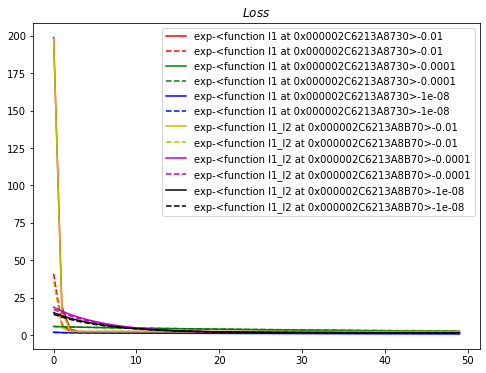

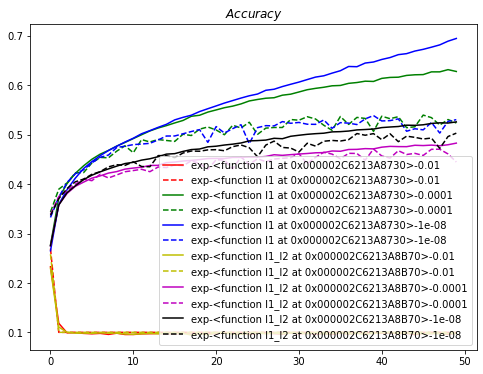

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize = (8, 6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]["train-loss"])), results[cond]["train-loss"], "-", label = cond, c = color_bar[i])
    plt.plot(range(len(results[cond]["valid-loss"])), results[cond]["valid-loss"], "--", label = cond, c = color_bar[i])
plt.title(r"$Loss$")
plt.legend()
plt.show()

plt.figure(figsize = (8, 6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]["train-acc"])), results[cond]["train-acc"], "-", label = cond, c = color_bar[i])
    plt.plot(range(len(results[cond]["valid-acc"])), results[cond]["valid-acc"], "--", label = cond, c = color_bar[i])
plt.title(r"$Accuracy$")
plt.legend()
plt.show()

